Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1234)

Loading the dataset

In [3]:
df = pd.read_csv("C:/Users/Ak/Desktop/Data Atom/Python Module/EDA Module/aerofit__treadmill_data - aerofit__treadmill_data.csv")
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


 Check the shape and datatypes

In [4]:
display("Shape of the dataset:", df.shape)
display("Data types of each column:", df.dtypes)

'Shape of the dataset:'

(180, 9)

'Data types of each column:'

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Check for missing and duplicate values

In [ ]:
missing_values = df.isnull().sum()
duplicate_count = df.duplicated().sum()
print("Missing values:", missing_values)
print("Number of duplicate rows:", duplicate_count)



Missing values:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64
Number of duplicate rows: 0


Numerical summary

In [6]:
display("Statistical summary of numerical features:", df.describe().T)

'Statistical summary of numerical features:'

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


 Categorical summary

In [7]:
display("Statistical Summary of categorical features:", df.describe(include=['object']).T)

'Statistical Summary of categorical features:'

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


Value counts for categorical features

In [8]:
for col in ['Product', 'Gender', 'MaritalStatus']:
    print(f"Value counts for {col}:", df[col].value_counts())

Value counts for Product: Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
Value counts for Gender: Gender
Male      104
Female     76
Name: count, dtype: int64
Value counts for MaritalStatus: MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


Unique attributes for categorical features

In [9]:
for col in ['Product', 'Gender', 'MaritalStatus']:
    print(f"Unique attributes for {col}:", df[col].unique())

Unique attributes for Product: ['KP281' 'KP481' 'KP781']
Unique attributes for Gender: ['Male' 'Female']
Unique attributes for MaritalStatus: ['Single' 'Partnered']


Numerical features: Distribution

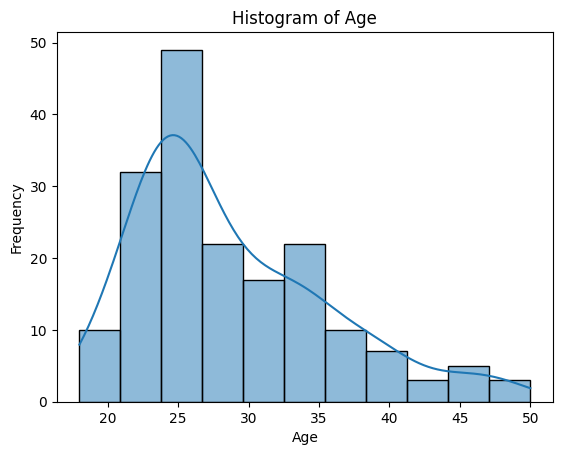

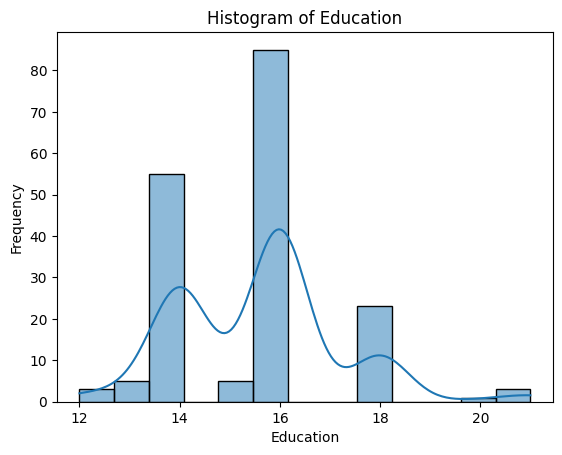

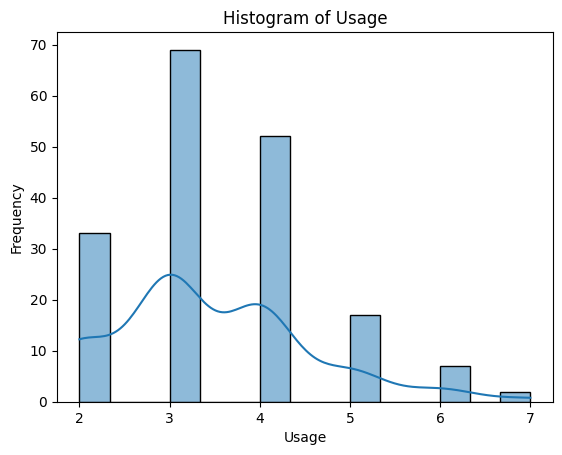

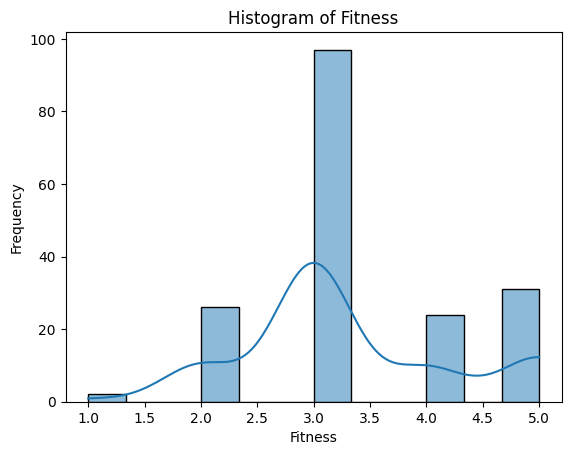

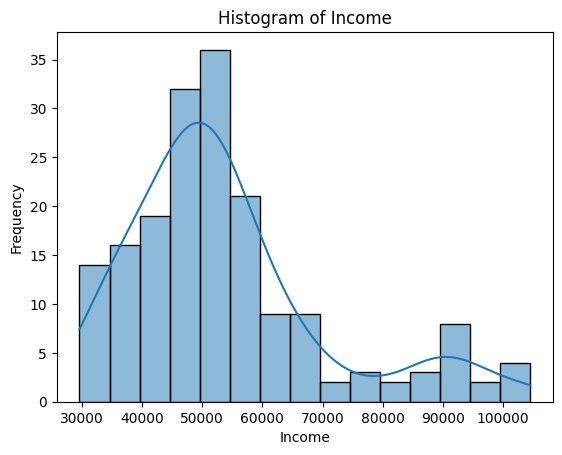

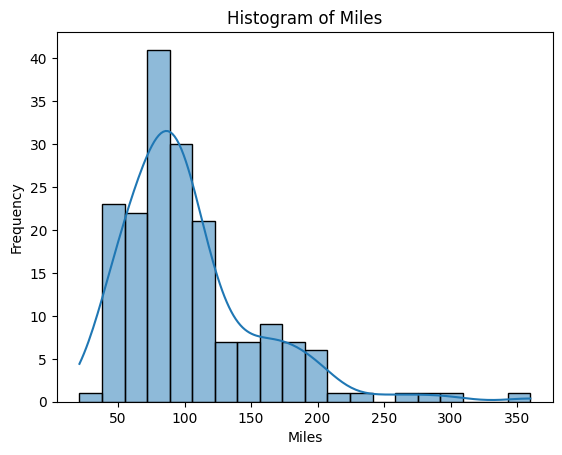

In [10]:
numerical_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

for col in numerical_cols:
    sns.histplot(df[col], kde=True)  # Add kde=True for a smoother distribution line
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

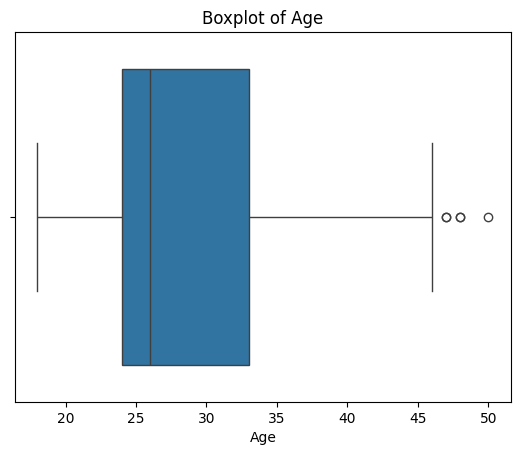

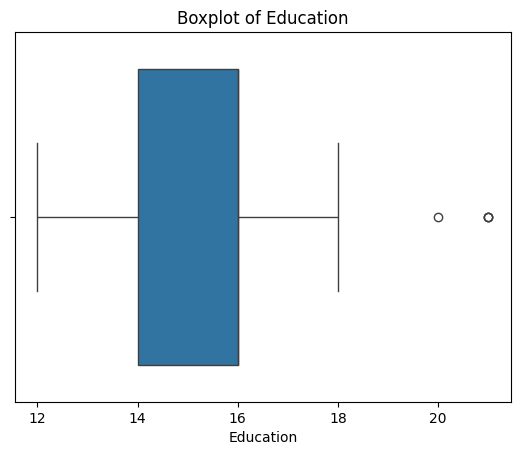

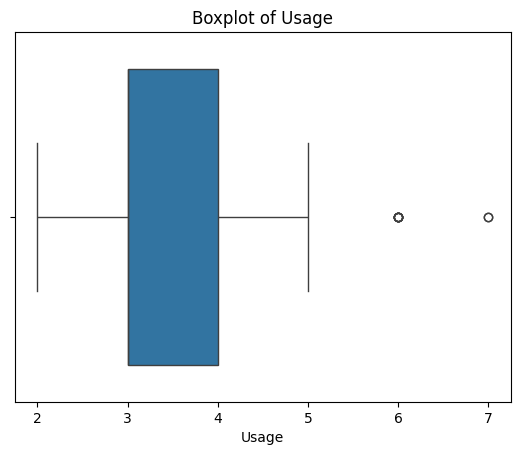

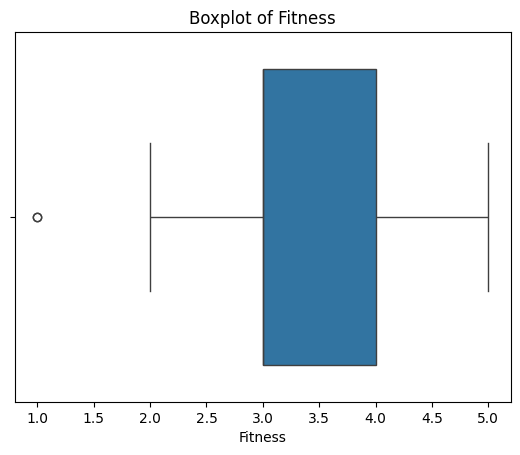

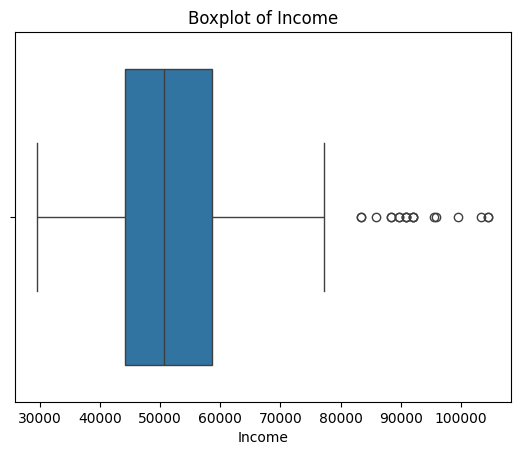

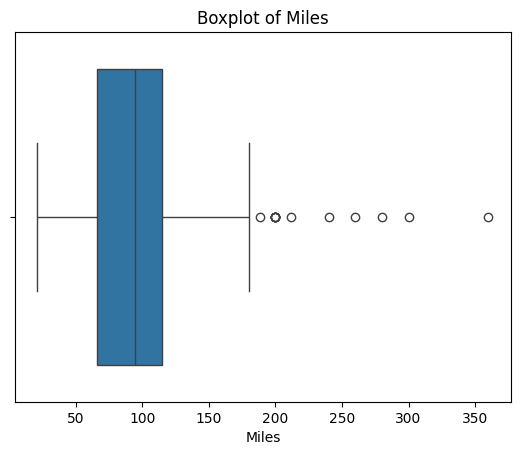

In [11]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Categorical features: Count plots

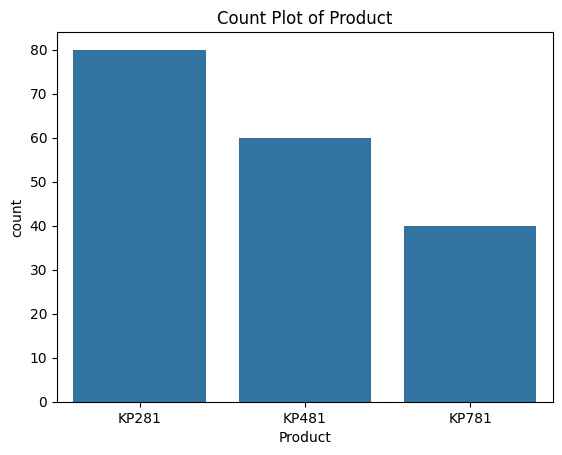

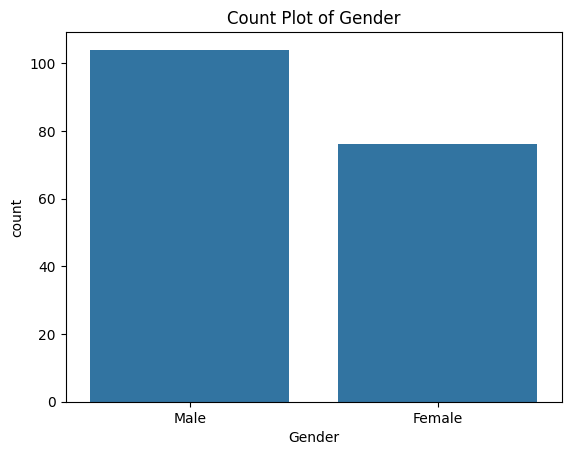

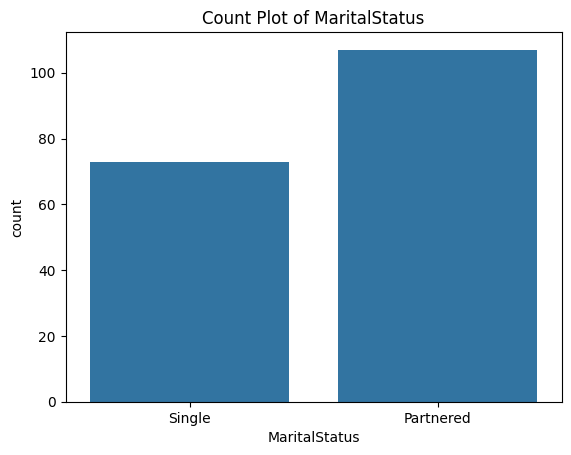

In [12]:
categorical_cols = ['Product', 'Gender', 'MaritalStatus']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.show()

Product vs Gender

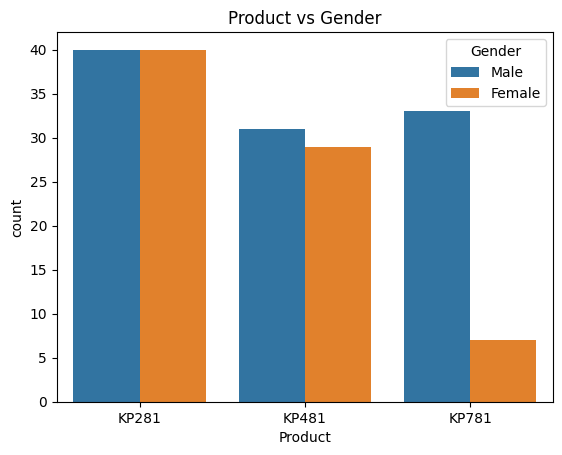

In [ ]:
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Product vs Gender')
plt.show()

Product Vs Marital Status

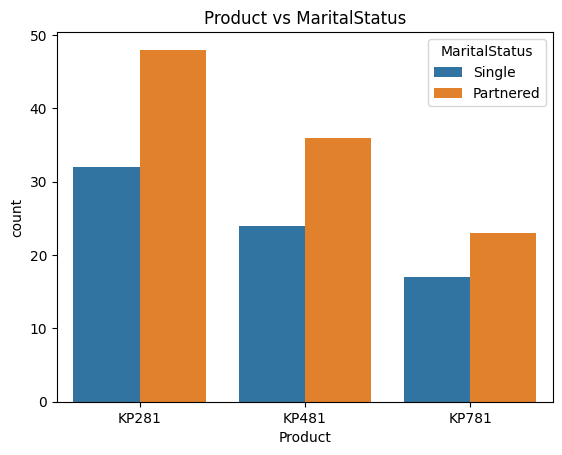

In [14]:
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Product vs MaritalStatus')
plt.show()

Product vs Age

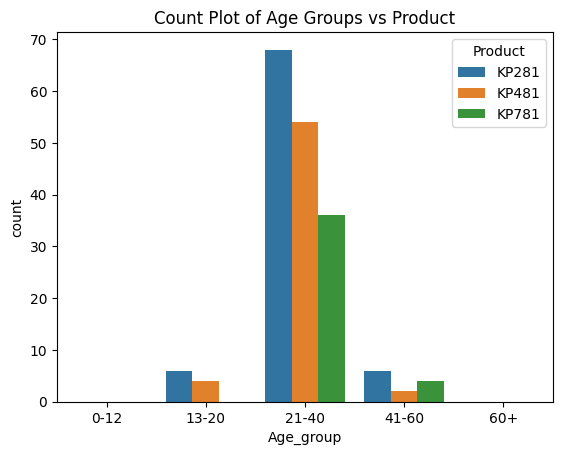

In [23]:
df['Age_group'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100], labels=['0-12', '13-20', '21-40', '41-60', '60+'])

sns.countplot(data=df, x='Age_group', hue='Product')  
plt.title('Count Plot of Age Groups vs Product')
plt.show()

Pairplot

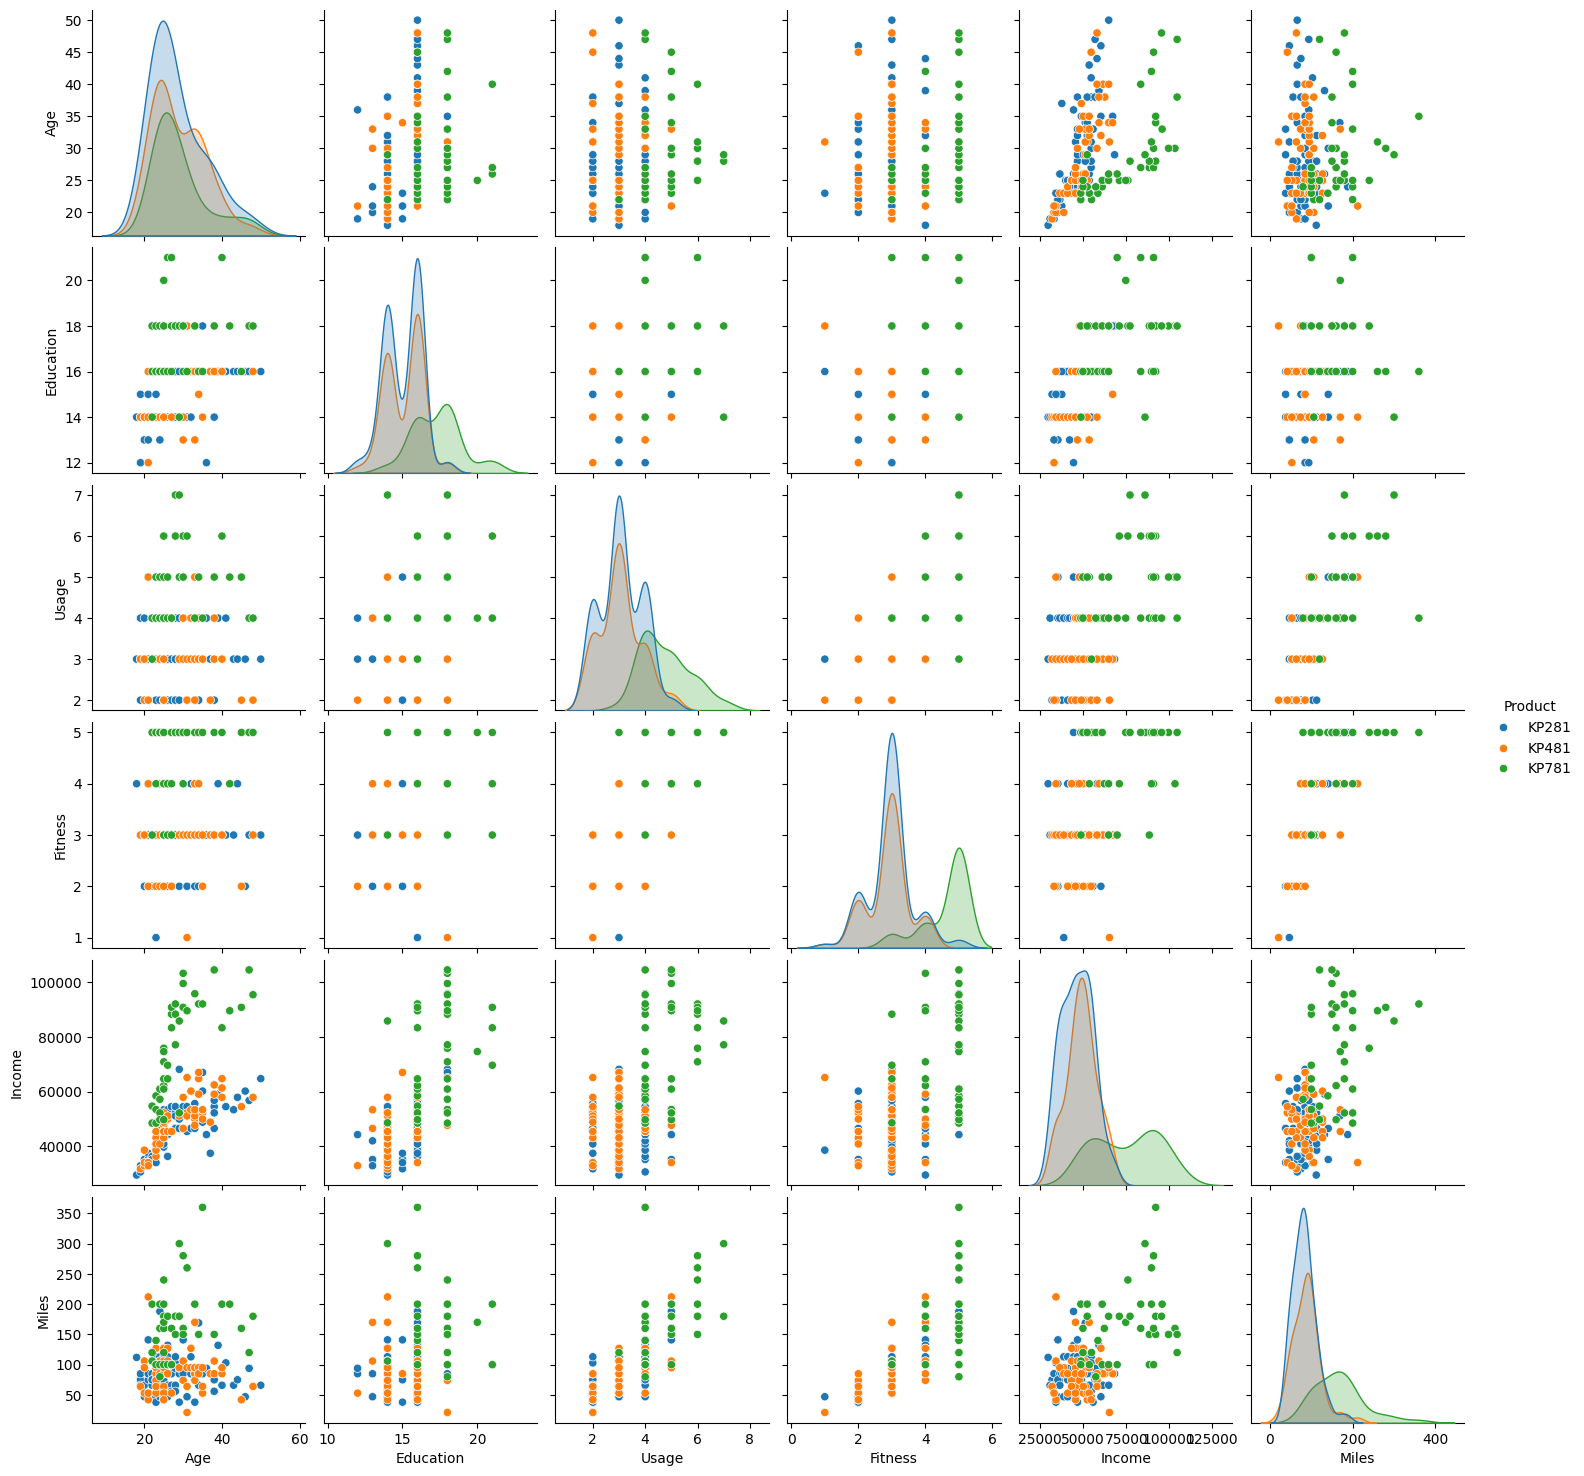

In [ ]:
sns.pairplot(df, hue='Product', diag_kind='kde')
plt.show()

Heatmap of Correlation Matrix

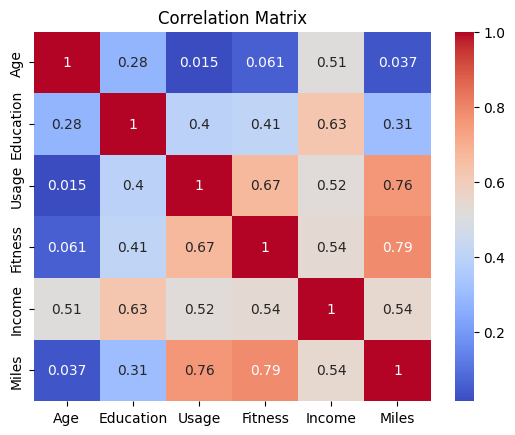

In [17]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Outlier detection using IQR

In [18]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    display(f"Outliers in {col}:", outliers)

'Outliers in Age:'

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


'Outliers in Education:'

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


'Outliers in Usage:'

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


'Outliers in Fitness:'

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


'Outliers in Income:'

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


'Outliers in Miles:'

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


In [26]:
total_customers = len(df)

product_percent = df['Product'].value_counts() / total_customers * 100

gender_percent = pd.crosstab(df['Product'], df['Gender'], normalize='index') * 100

age_20_30 = df[(df['Age'] >= 20) & (df['Age'] <= 30)]
low_income = df[df['Income'] < 40000]
high_income = df[df['Income'] >= 75000]
fitness_5 = df[df['Fitness'] == 5]

print("Product percentages:", round(product_percent))
print("\nGender percentages per product:\n", round(gender_percent))
print("Customers aged 20-30 as percentage:", round(len(age_20_30) / total_customers * 100))
print("\nLow-income customers as percentage:\n", round(len(low_income) / total_customers * 100))
print("High-income KP781 customers:", round(len(high_income[high_income['Product'] == 'KP781']) / total_customers * 100))
print("\nFitness level 5 customers as percentage:\n", round(len(fitness_5) / total_customers * 100))

Product percentages: Product
KP281    44.0
KP481    33.0
KP781    22.0
Name: count, dtype: float64

Gender percentages per product:
 Gender   Female  Male
Product              
KP281      50.0  50.0
KP481      48.0  52.0
KP781      18.0  82.0
Customers aged 20-30 as percentage: 64

Low-income customers as percentage:
 18
High-income KP781 customers: 12

Fitness level 5 customers as percentage:
 17
